In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

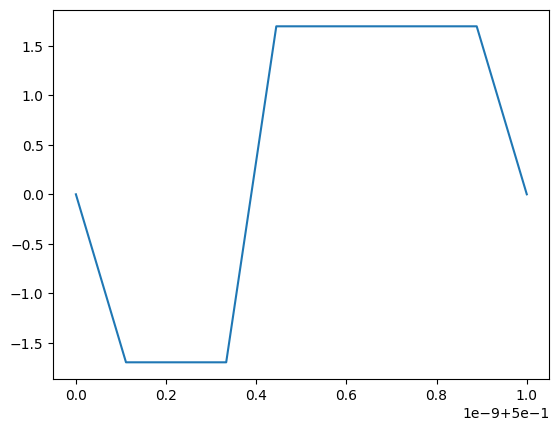

In [2]:
# white and black line to separate two parts of contianer 
x1 = np.linspace(0.500000000,0.500000001,10)
v = 0*x1
v2 = 0*x1
v3 = 0*x1
v0=1.7
v02=0.55
v03=0.45
for i in range(len(v)):
    if x1[i]<=0.5000000009 and x1[i]>=0.5000000004:
        v[i]=v0
    if x1[i]< 0.5000000004 and  x1[i]>=0.5000000001:
        v[i]=-v0
for i in range(len(v)):
    if x1[i]<=0.5000000009 and x1[i]>=0.5000000004:
        v2[i]=v02
    if x1[i]< 0.5000000004 and  x1[i]>=0.5000000001:
        v2[i]=-v02
for i in range(len(v)):
    if x1[i]<=0.5000000009 and x1[i]>=0.5000000004:
        v3[i]=v03
    if x1[i]< 0.5000000004 and  x1[i]>=0.5000000001:
        v3[i]=-v03
plt.plot(x1,v)      

In [3]:
xq = 1/2.05*np.random.random(1000)
yq = np.random.random(1000)

In [4]:
def F(k):
    xq = 1/2.05*np.random.random(1000)
    yq = np.random.random(1000)
    for i in range(k):
        A = np.random.randint(0,1000)
        x = xq[A]
        y = yq[A]
        if x < 0.5 :
            x = 1/1.95 + 1/2.05*np.random.random()
            y = np.random.random()
            xq[A] = x
            yq[A] = y
        else :
            x = 1/2.05*np.random.random()
            y = np.random.random()
            xq[A] = x
            yq[A] = y
        NPA = len(xq[xq < 0.5])
        NPB = len(xq[xq > 0.5])
    return xq,yq,NPA,NPB

In [5]:
F(1)[2]

999

In [6]:
k = 2000
NPA_list = []
for j in range(1,k+1):
    NPA_list.append(F(j)[2])
NPB_list = []
for j in range(1,k+1):
    NPB_list.append(F(j)[3])

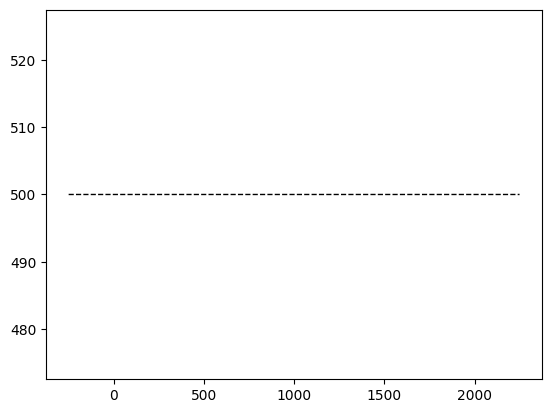

In [7]:
# line for half of initial particle
NPH = 0*(np.arange(1,k+500,1)-250)
for i in range(len(NPH)):
        NPH[i]=500
plt.plot(np.arange(1,k+500,1)-250,NPH,linestyle = "--",color = "black", linewidth = 1)

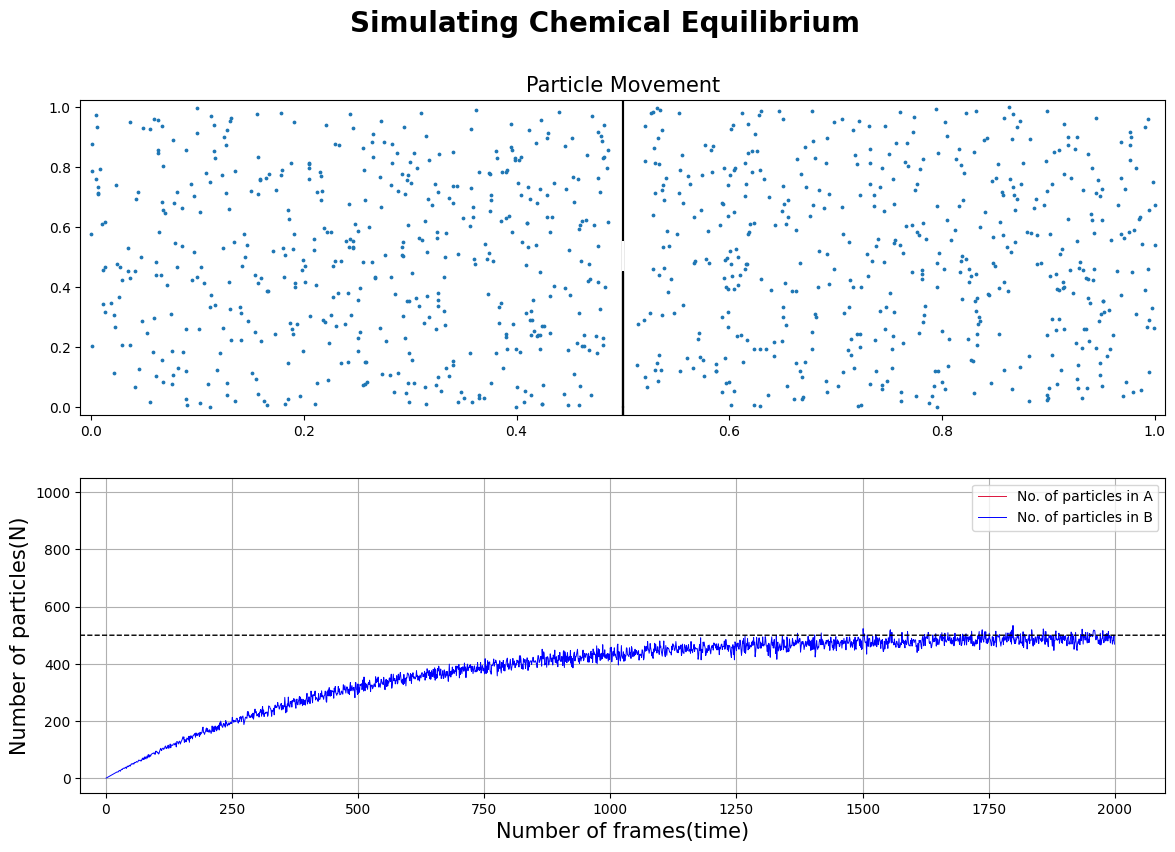

In [8]:
fig, ax = plt.subplots(2,1,figsize=(14,9)) 
fig.suptitle("Simulating Chemical Equilibrium", fontsize = 20,fontweight = 'bold')
ax[0].set_title('Particle Movement', fontsize = 15)
lnNPA, = plt.plot([],[],linewidth = 0.7,color="crimson",label='No. of particles in A')
lnNPB, = plt.plot([],[],linewidth = 0.7,color="b",label='No. of particles in B')
xq,yq,_,_ = F(1)
sc = ax[0].scatter(xq,yq,s=3)
ax[0].set_xlim([-0.010,1.010])
ax[0].set_ylim([-0.025,1.025])
ax[0].plot(x1[0:],v[0:],color="black")
ax[0].plot(x1[0:],v2[0:],color="white")
ax[0].plot(x1[0:],v3[0:],color="black")
ax[1].plot(np.arange(1,k+500,1)-250,NPH,linestyle = "--", linewidth = 1,color="black")
ax[1].set_ylim([-50,1050])
ax[1].set_xlim([-50,k+100])
ax[1].grid(True)
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Number of frames(time)', fontsize=15)
ax[1].set_ylabel('Number of particles(N)', fontsize=15)
def init():
    xq,yq,_,_ = F(1+i)
    lnNPA.set_data([],[])
    lnNPA.set_data([],[]) 
    return lnNPA,lnNPB
    
def animate(i):
    xq,yq,_,_ = F(1+i)
    sc.set_offsets(np.c_[xq,yq])
    Nframe = np.arange(1,i+1)
    lnNPA.set_data(Nframe,NPA_list[:i])
    lnNPB.set_data(Nframe,NPB_list[:i])
    return lnNPA,lnNPB,sc
ani = animation.FuncAnimation(fig,animate,frames=k,init_func=init,interval=50)   
ani.save('Simulation of Chemical Equilibrium.gif',writer='pillow',fps=10,dpi=100)